# Modelo Duplo massa-mola amortecido e forçado

Frederico Furst Bittencourt

2023/11/24 from 2022/09/17

Copied and modified from https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html (em 2002/jun/07).

## Intro

This file was created as part of the 

## Massa-Mola 

#### Imports and Libraries

In [39]:
# import nolds
import numpy as np
# Plot the solution that was generated
import matplotlib.pyplot as plt
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint, solve_ivp
# ks entropy
# import EntropyHub as EH

In [40]:
# import vapeplot
%matplotlib inline
# vapeplot.available()

In [41]:
# vapeplot.set_palette('macplus')

## Model Specification

In [42]:
forca_inicial = 0.0
forca_final = -249.97 # -1.0 # F0 = 249.97
tempo_inicial = 0.0
tempo_final = 25.0

## Definição do n

In [43]:
n = 2 # n > 2 seria a condicao de teste

In [44]:
249.97 / 0.01192

20970.637583892618

$ \frac{N}{mm}$

In [45]:
1.57*200*40*1.8288*2

45939.456

$\frac{g}{cm^3}*mm^3$

In [46]:
# Parameter values
# Masses:
# m1 = 2.0
m = 45.94/n # 2.0/n # m0 = 8.4 gramas

# Spring constants
# k1 = 5.0
k = 20970.7*n # 2.5*n 
# d = - 0.01192 mm
# F = 249.97 N
# k ~ 20970.7 N/mm

# Natural lengths
# L1 = 1.0
L = 200.0/n # 4.0/n
# L0 = 200.0 mm

# Friction coefficients
# b1 = 0.6
b = 50.6

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
xizesys = [ (n+2)*L/2 if n%2==0 else 0.0 for n in range(2*n) ]
xizesys_desl = xizesys # [:-2]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 25.0
numpoints = 10000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

In [47]:
t

[0.0,
 0.0025002500250025004,
 0.005000500050005001,
 0.007500750075007501,
 0.010001000100010001,
 0.0125012501250125,
 0.015001500150015001,
 0.0175017501750175,
 0.020002000200020003,
 0.022502250225022502,
 0.025002500250025,
 0.027502750275027504,
 0.030003000300030003,
 0.032503250325032505,
 0.035003500350035,
 0.0375037503750375,
 0.040004000400040006,
 0.0425042504250425,
 0.045004500450045004,
 0.04750475047504751,
 0.05000500050005,
 0.052505250525052505,
 0.05500550055005501,
 0.0575057505750575,
 0.060006000600060005,
 0.0625062506250625,
 0.06500650065006501,
 0.0675067506750675,
 0.07000700070007,
 0.07250725072507251,
 0.075007500750075,
 0.0775077507750775,
 0.08000800080008001,
 0.08250825082508251,
 0.085008500850085,
 0.08750875087508751,
 0.09000900090009001,
 0.0925092509250925,
 0.09500950095009501,
 0.09750975097509751,
 0.1000100010001,
 0.10251025102510251,
 0.10501050105010501,
 0.1075107510751075,
 0.11001100110011001,
 0.11251125112511251,
 0.11501150115011

## Entrada de Degrau de Força em $x_3$

### Entradas

#### Degrau de Força de Entrada

In [48]:
# degrau de forca
def degrau_forca(t):
    if t <= tempo_inicial:
        forca = forca_inicial
    else:
        forca = forca_final
    return forca

#### Campo Vetorial

In [49]:
def degrau_forca_vectorfield_solve_ivp(t, w, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2,x3,y3]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,m3,k1,k2,k3,L1,L2,L3,b1,b2,b3]
    """
#    x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7, x8, y8, x9, y9, \
#      x10, y10, x11, y11, x12, y12, x13, y13, x14, y14, x15, y15, x16, y16 = w
    # print(t)
    # print(w)
    # print(p)
    m, k, L, b = p

    # Create f = (x1',y1',x2',y2' ...):
    f = [ ]
    f.append( w[1] )
    if n == 1:
        f.append( (-b * w[1] - k * (w[0] - L) + degrau_forca(t))/ m )
    elif n >= 2:
        f.append( (-b * w[1] + b * (w[3] - w[1]) - k * (w[0] - L) + k * (w[2] - w[0] - L ) )/ m )
                # (-b * y1   + b * (y2   - y1)   - k * (x1   - L) + k * (x2     - x1    - L) ) / m,
        for i in range(2,2*n-2):
            if i % 2 == 0:
                f.append( w[i+1] )
            else:
                f.append( (-b * (w[i]-w[i-2]) + b * (w[i+2] - w[i]) - k * (w[i-1] - w[i-3] - L) + k * (w[i+1] - w[i-1] - L) ) / m )
    # item 2*n-2 = 2*16-2 = 32 - 2 = 30
        f.append( w[2*n-1] )
        f.append( (-b * (w[2*n-1] - w[2*n-3])  - k * (w[2*n-2] - w[2*n-4] - L) + degrau_forca(t)) / m )
    # y16,
    # (-b * (y16 - y15)  - k * (x16 - x15 - L) + degrau_forca(t)) / m,
    return f

### Saídas

#### Unpacking

In [50]:
# Pack up the parameters and initial conditions:
p = [m, k, L, b]
w0 = xizesys

# Call the ODE solver.
# wsol = odeint(degrau_forca_vectorfield, w0, t, args=(p,),
#               atol=abserr, rtol=relerr)
wsol = solve_ivp(degrau_forca_vectorfield_solve_ivp, (0.0, 25.0), w0, args=(p, ),
                 t_eval=t, atol=abserr, rtol=relerr)

at, ax, ay, = [],[[] for i in range(n)],[[] for i in range(n)],
# adendo
IE, KE = [[] for i in range(n)],[[] for i in range(n)],
ET = []
y = [list(i) for i in zip(*wsol.y)]
for t1, w1 in zip(wsol.t, y):
    # print( t1, w1[0], w1[1], w1[2], w1[3])
    at.append(t1)
    for i in range(n):
        ax[i].append(w1[2*i])
        ay[i].append(w1[2*i+1])
        if i==0:
            IE[i].append(k*(w1[2*i]-L)**2/2)
        else:
            IE[i].append(k*(w1[2*i]-w1[2*i-2]-L)**2/2)
        KE[i].append(m*w1[2*i+1]**2/2)
    ET.append(np.sum([k*(w1[2*i]-L)**2/2+m*w1[2*i+1]**2/2 if i == 0 else k*(w1[2*i]-w1[2*i-2]-L)**2/2+m*w1[2*i+1]**2/2 for i in range(n) ]))

#### Forças Aplicada e de Reação

Text(0.5, 1.0, 'Reaction and Applied Forces for 2-Discrete Spring-Mass System degrau forca')

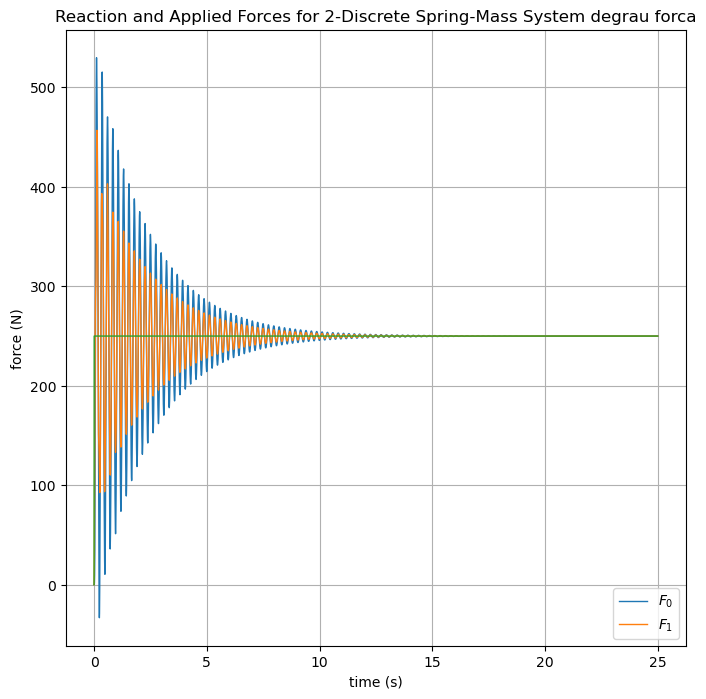

In [51]:
plt.figure(figsize=(8,8))
F = [[] for i in range(n)]
for i in range(n):
    if i == 0:
        F[i] = -k*np.array(ax[i]) + np.array([k*L for i in range(len(ax[i]))])
    else:
        F[i] = -k*np.array(ax[i]) +k*np.array(ax[i-1]) + np.array([k*L for i in range(len(ax[i]))])
    plt.plot(at, F[i], linewidth=1)
plt.plot(at, -np.array([ degrau_forca(t) for t in at ]), linewidth=1)

plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend([r'$F_{'+str(i)+r'}$' for i in range(n) ],loc='lower right')
plt.title('Reaction and Applied Forces for '+str(n)+'-Discrete Spring-Mass System degrau forca')

Text(0.5, 1.0, 'Reaction and Applied Forces for 2-Discrete Spring-Mass System degrau forca')

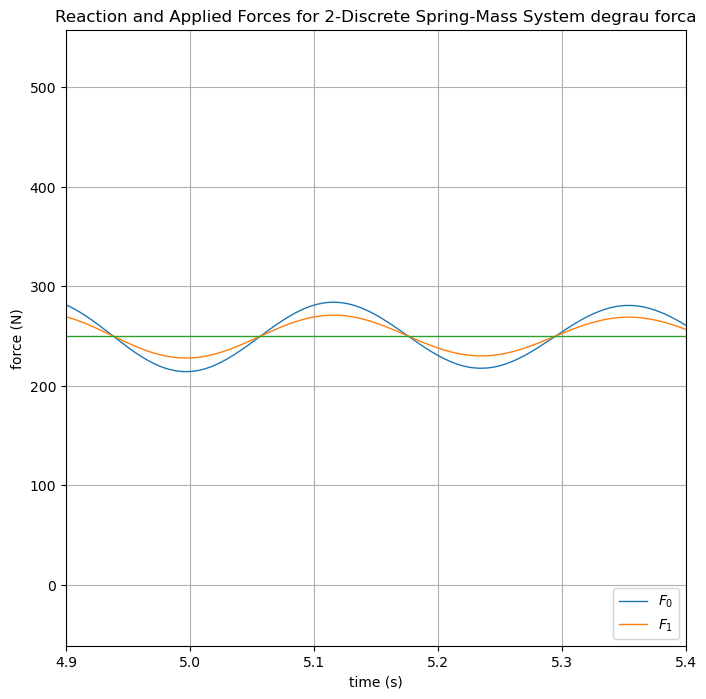

In [52]:
plt.figure(figsize=(8,8))
F = [[] for i in range(n)]
for i in range(n):
    if i == 0:
        F[i] = -k*np.array(ax[i]) + np.array([k*L for i in range(len(ax[i]))])
    else:
        F[i] = -k*np.array(ax[i]) +k*np.array(ax[i-1]) + np.array([k*L for i in range(len(ax[i]))])
    plt.plot(at, F[i], linewidth=1)
plt.plot(at, -np.array([ degrau_forca(t) for t in at ]), linewidth=1)
axis = plt.gca()
axis.set_xlim(4.9, 5.4)
# ax.set_ylim([ymin, ymax])
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend([r'$F_{'+str(i)+r'}$' for i in range(n) ],loc='lower right')
plt.title('Reaction and Applied Forces for '+str(n)+'-Discrete Spring-Mass System degrau forca')

Text(0.5, 1.0, 'Reaction and Applied Forces for 2-Discrete Spring-Mass System degrau forca')

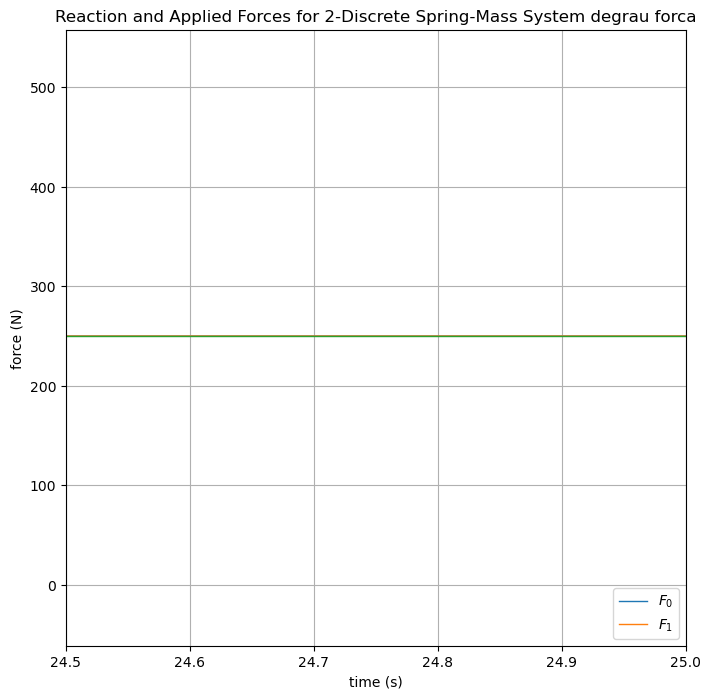

In [53]:
plt.figure(figsize=(8,8))
F = [[] for i in range(n)]
for i in range(n):
    if i == 0:
        F[i] = -k*np.array(ax[i]) + np.array([k*L for i in range(len(ax[i]))])
    else:
        F[i] = -k*np.array(ax[i]) +k*np.array(ax[i-1]) + np.array([k*L for i in range(len(ax[i]))])
    plt.plot(at, F[i], linewidth=1)
plt.plot(at, -np.array([ degrau_forca(t) for t in at ]), linewidth=1)
axis = plt.gca()
axis.set_xlim([24.5, 25])
# ax.set_ylim([ymin, ymax])
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend([r'$F_{'+str(i)+r'}$' for i in range(n) ],loc='lower right')
plt.title('Reaction and Applied Forces for '+str(n)+'-Discrete Spring-Mass System degrau forca')

### Phase Space Plot

In [54]:

r1, r2, r3 = 0.01, 0.02, 0.03
p=1

def ffplot2D_vel_desl(x3pre,y1pre):
    u = x3pre # *1e3
    v = y1pre # *np.sqrt(ms)*1e3
    plt.figure(figsize=(10,8))
    plt.grid(visible=True)
    plt.xlabel('Mass displacement (mm)')
    plt.ylabel('Mass velocity (mm/s)')
    plt.plot(u,v,)#'.')
    assert len(u) == len(v)
    n = len(u)
    distances = []
    delta_u = (max(u)-min(u))/2
    print('delta_u: '+str(delta_u))
    delta_v = (max(v)-min(v))/2
    print('delta_v: '+str(delta_v))
    for k in range(n-p):
        distances.append(np.sqrt(((u[k+p]-u[k])/delta_u)**2+((v[k+p]-v[k])/delta_v)**2))
    u1,u2,u3, v1,v2, v3 = [],[],[],[],[],[]
    for k in range(len(distances)):
        if distances[k] < r1:
            u1.append(u[k])
            v1.append(v[k])
        if distances[k] < r2:
            u2.append(u[k])
            v2.append(v[k])
        if distances[k] < r3:
            u3.append(u[k])
            v3.append(v[k])
    plt.title('3. Trajectories for velocity x displacement minus adjusted ramp\n'+\
            'of double mass-spring'+\
            'system subjected to a Force step [middle mass]')
    plt.plot(u3,v3,'.')
    plt.plot(u2,v2,'.')
    plt.plot(u1,v1,'.')
    plt.legend((r'$'+str(r3)+' \leq r$',r'$'+str(r2)+'\leq r<'+str(r3)+\
                '$',r'$'+str(r1)+' \leq r<'+str(r2)+'$',r'$0.0 \leq r<'+str(r1)+'$'))
    plt.savefig('3_double_force_middle.png')
    plt.show()

delta_u: 0.006712185523447545
delta_v: 0.2099274500368628


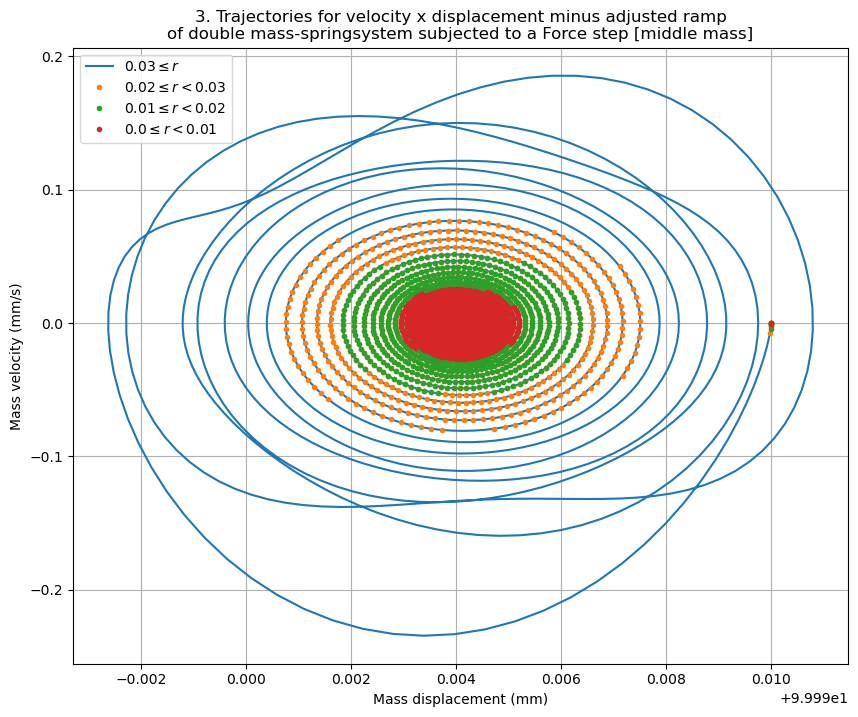

In [55]:
ffplot2D_vel_desl(ax[0],ay[0])

In [56]:

r1, r2, r3 = 0.01, 0.02, 0.03
p=1

def ffplot2D_vel_desl(x3pre,y1pre):
    u = x3pre # *1e3
    v = y1pre # *np.sqrt(ms)*1e3
    plt.figure(figsize=(10,8))
    plt.grid(visible=True)
    plt.xlabel('Mass displacement (mm)')
    plt.ylabel('Mass velocity (mm/s)')
    plt.plot(u,v,)#'.')
    assert len(u) == len(v)
    n = len(u)
    distances = []
    delta_u = (max(u)-min(u))/2
    print('delta_u: '+str(delta_u))
    delta_v = (max(v)-min(v))/2
    print('delta_v: '+str(delta_v))
    for k in range(n-p):
        distances.append(np.sqrt(((u[k+p]-u[k])/delta_u)**2+((v[k+p]-v[k])/delta_v)**2))
    u1,u2,u3, v1,v2, v3 = [],[],[],[],[],[]
    for k in range(len(distances)):
        if distances[k] < r1:
            u1.append(u[k])
            v1.append(v[k])
        if distances[k] < r2:
            u2.append(u[k])
            v2.append(v[k])
        if distances[k] < r3:
            u3.append(u[k])
            v3.append(v[k])
    plt.title('4. Trajectories for velocity x displacement of double mass-spring\n'+\
              'system subjected to a Displacement ramp [edge mass]')
    plt.title('4. Trajectories for velocity x displacement minus adjusted ramp\n'+\
            'of double mass-spring'+\
            'system subjected to a Force step [edge mass]')
    plt.plot(u3,v3,'.')
    plt.plot(u2,v2,'.')
    plt.plot(u1,v1,'.')
    plt.legend((r'$'+str(r3)+' \leq r$',r'$'+str(r2)+'\leq r<'+str(r3)+\
                '$',r'$'+str(r1)+' \leq r<'+str(r2)+'$',r'$0.0 \leq r<'+str(r1)+'$'))
    plt.savefig('4_double_force_edge.png')
    plt.show()

delta_u: 0.011425203719227284
delta_v: 0.28587061072781905


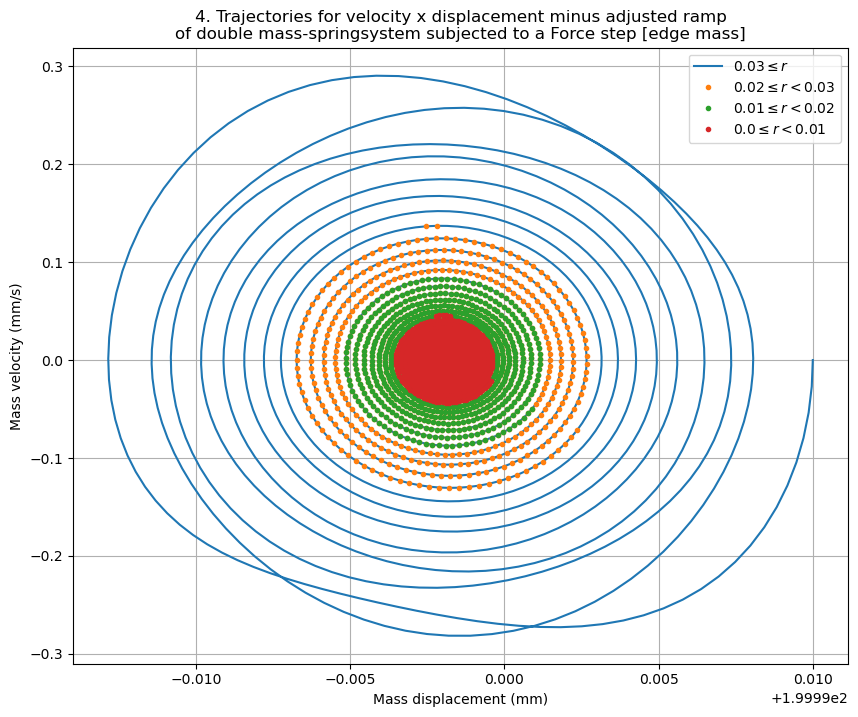

In [57]:
ffplot2D_vel_desl(ax[1],ay[1])

In [58]:
forcas = [ max(F[i]) for i in range(n) ]
forcas.index(max(forcas))

0

In [59]:
forcas[forcas.index(max(forcas))]

529.8156957118772

## Entrada de Rampa em Deslocamento em $x_3$

### Entradas

In [60]:
# b=0.6

#### Rampa de Força de Entrada

In [61]:
# rampa de forca
def rampa_forca(t):
    if t < tempo_inicial:
        forc = forca_inicial
    elif t >= tempo_inicial and t <= tempo_final:
        # forc = 5.0-1.0*t
        forc = forca_inicial+(forca_final-forca_inicial)/(tempo_final-tempo_inicial)*(t-tempo_inicial)
    else:
        forc = forca_final
    return forc

#### Rampa em Degrau de Entrada

In [62]:
def rampa_disp(t):
    return rampa_forca(t)*(n/k) + (n*L)

Criando uma derivada da função rampa definida de forma simbólica.

In [63]:
from sympy import Piecewise
from sympy import symbols

In [64]:
tempo = symbols('t')
rampa_desl = Piecewise(
    (forca_inicial*(n/k)+(n*L), (tempo > 0.0) & (tempo < tempo_inicial)),
    (n/k*(forca_inicial+(forca_final-forca_inicial)/(tempo_final-tempo_inicial)*(tempo-tempo_inicial))+n*L, \
      (tempo >= tempo_inicial) & (tempo < tempo_final)),
    (forca_final*(n/k)+(n*L), (tempo >= tempo_final))
)
rampa_desl_derivada = rampa_desl.diff(tempo)
rampa_desl.diff(tempo)

Piecewise((0, (t > 0) & (t < 0)), (-0.000476798580877128, (t < 25.0) & (t >= 0)), (0, t >= 25.0))

In [65]:
def deriv_desl(t):
     if t < tempo_inicial:
         dd = 0.0
     elif t >= tempo_inicial and t <= tempo_final:
         # forc = 5.0-1.0*t
         dd = n/k*(forca_inicial+(forca_final-forca_inicial)/(tempo_final-tempo_inicial))
     else:
         dd = 0.0
     return dd

In [66]:
rampa_desl

Piecewise((200.0, (t > 0) & (t < 0)), (200.0 - 0.000476798580877128*t, (t < 25.0) & (t >= 0)), (199.988080035478, t >= 25.0))

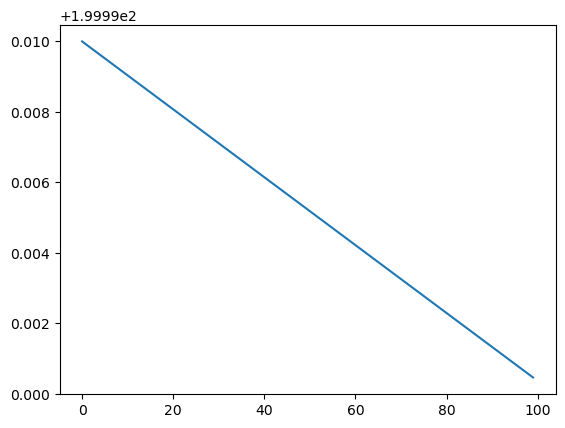

In [67]:
plt.plot([ rampa_disp(t) for t in np.linspace(0.0,20.0,100)])

#### Campo Vetorial

In [68]:
def rampa_desl_vectorfield(t, w, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2,x3,y3]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,m3,k1,k2,k3,L1,L2,L3,b1,b2,b3]
    """
#    x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7, x8, y8, x9, y9, \
#      x10, y10, x11, y11, x12, y12, x13, y13, x14, y14, x15, y15, x16, y16 = w
    m, k, L, b = p

    # Create f = (x1',y1',x2',y2' ...):
    f = [ ]
    f.append( w[1] )
    assert n==2
    f.append( (-b * w[1] + b * (w[3] - w[1]) - k * (w[0] - L) + k * (w[2] - w[0] - L ) )/ m )
    f.append( w[3])
    # f.append( (-b * w[3] + b * (deriv_desl(t) - w[3]) - k * (w[2] - L) + k * (rampa_disp(t) - w[2] - L ) )/ m )
    f.append( (-b * w[3] + b * (deriv_desl(t) - w[3]) - k * (w[2] - rampa_disp(t)))/ m )
    # y15,
    # (-b * (y15 - y14) + b * (deriv_desl(t) - y15) - k * (x15 - x14 - L) + k * (rampa_disp(t) - x15 - L) ) / m,
    return f

### Saídas

#### Unpacking

In [69]:
# Pack up the parameters and initial conditions:
p = [m, k, L, b]
w0 = xizesys_desl # [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7, x8, y8, x9, y9, \
     #  x10, y10, x11, y11, x12, y12, x13, y13, x14, y14, x15, y15,] #  x16, y16]

# Call the ODE solver.
# wsol = odeint(rampa_desl_vectorfield, w0, t, args=(p,),
#               atol=abserr, rtol=relerr)
wsol = solve_ivp(rampa_desl_vectorfield, (0.0, 25.0), w0, args=(p, ),
                 t_eval=t, atol=abserr, rtol=relerr)

at, ax, ay, = [],[[] for i in range(n)],[[] for i in range(n)],
y = [list(i) for i in zip(*wsol.y)]
for t1, w1 in zip(wsol.t, y):
    # print( t1, w1[0], w1[1], w1[2], w1[3])
    at.append(t1)
    for i in range(n):
        ax[i].append(w1[2*i])
        ay[i].append(w1[2*i+1])

#### Forças de Reação

Text(0.5, 1.0, 'Reaction and Applied Forces for 2-Discrete Spring-Mass System degrau forca')

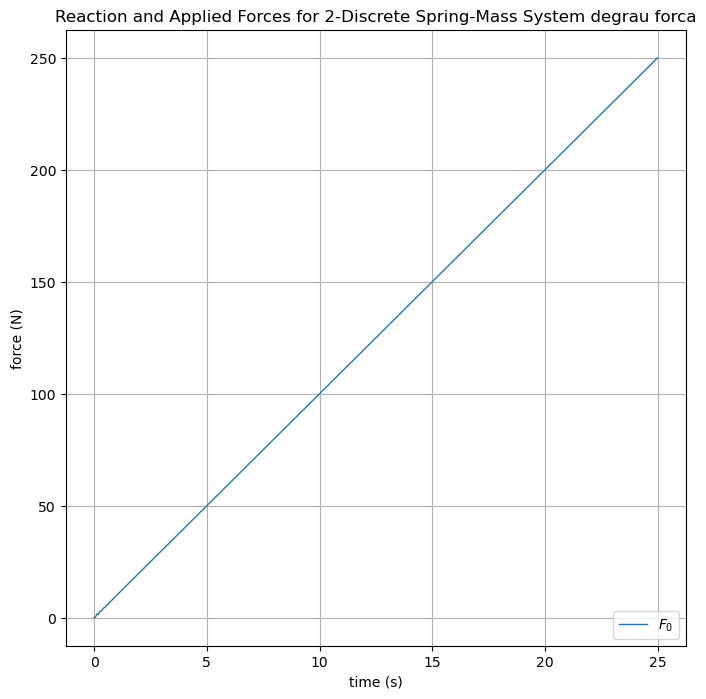

In [70]:
plt.figure(figsize=(8,8))
F0 = -k*np.array(ax[0]) + np.array([k*L for _ in range(len(ax[0]))])
F1 = -k*(np.array(ax[0])-np.array(ax[1])) + np.array([k*L for _ in range(len(ax[0]))])
# F2 = -k*np.array(ax[0]) + np.array([k*L for _ in range(len(ax[0]))])
plt.plot(at, F0, linewidth=1)
# plt.plot(at, F1, linewidth=1)
# plt.plot(at, F2, linewidth=1)
# plt.plot(at, -np.array([ rampa_forca(t) for t in at ]), linewidth=1)

plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend([r'$F_{'+str(i)+r'}$' for i in range(n) ],loc='lower right')
plt.title('Reaction and Applied Forces for '+str(n)+'-Discrete Spring-Mass System degrau forca')

Text(0.5, 1.0, 'Reaction and Applied Forces for 2-Discrete Spring-Mass System Rampa Desl')

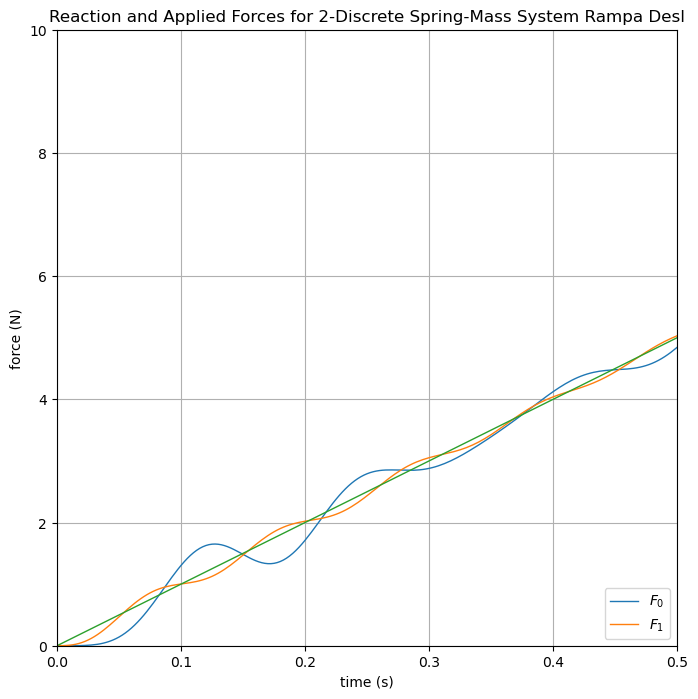

In [71]:
plt.figure(figsize=(8,8))
F = [[] for _ in range(n)]
for i in range(n):
    if i == 0:
        F[i] = -k*np.array(ax[i]) + np.array([k*L for i in range(len(ax[i]))])
    else:
        F[i] = -k*np.array(ax[i]) +k*np.array(ax[i-1]) + np.array([k*L for _ in range(len(ax[i]))])
    plt.plot(at, F[i], linewidth=1)
plt.plot(at, -np.array([ rampa_forca(t) for t in at ]), linewidth=1)
axis = plt.gca()
axis.set_xlim(0.0, 0.5)
axis.set_ylim([0, 10])
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend([r'$F_{'+str(i)+r'}$' for i in range(n) ],loc='lower right')
plt.title('Reaction and Applied Forces for '+str(n)+'-Discrete Spring-Mass System Rampa Desl')

Text(0.5, 1.0, 'Reaction and Applied Forces for 2-Discrete Spring-Mass System degrau forca')

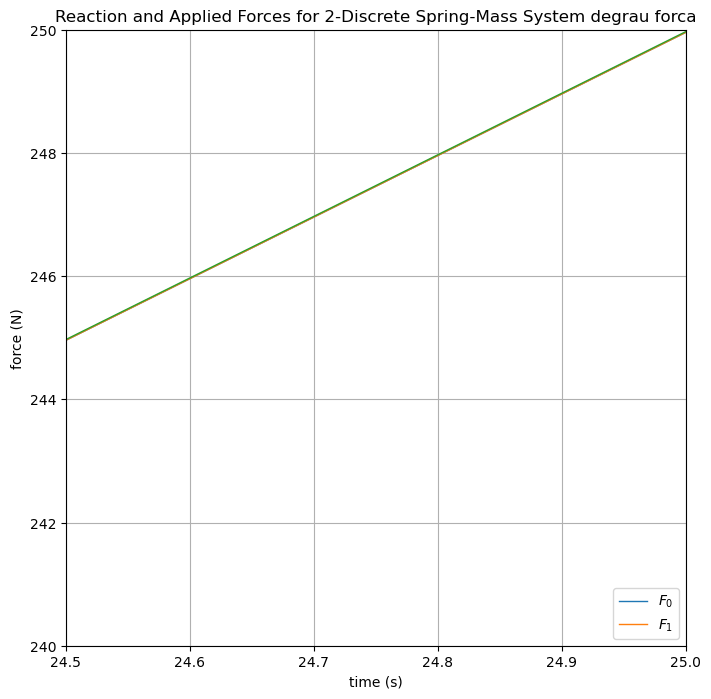

In [72]:
plt.figure(figsize=(8,8))
F = [[] for i in range(n)]
for i in range(n):
    if i == 0:
        F[i] = -k*np.array(ax[i]) + np.array([k*L for i in range(len(ax[i]))])
    else:
        F[i] = -k*np.array(ax[i]) +k*np.array(ax[i-1]) + np.array([k*L for _ in range(len(ax[i]))])
    plt.plot(at, F[i], linewidth=1)
plt.plot(at, -np.array([ rampa_forca(t) for t in at ]), linewidth=1)

axis = plt.gca()
axis.set_xlim([24.5, 25])
axis.set_ylim([240, 250])
plt.grid(visible=True)
plt.xlabel('time (s)')
plt.ylabel('force (N)')
plt.legend([r'$F_{'+str(i)+r'}$' for i in range(n) ],loc='lower right')
plt.title('Reaction and Applied Forces for '+str(n)+'-Discrete Spring-Mass System degrau forca')

In [73]:

r1, r2, r3 = 0.01, 0.02, 0.03
p=1

def ffplot2D_vel_desl(x3pre,y1pre):
    u = x3pre # *1e3
    v = y1pre # *np.sqrt(ms)*1e3
    plt.figure(figsize=(10,8))
    plt.grid(visible=True)
    plt.xlabel('Mass displacement (mm)')
    plt.ylabel('Mass velocity (mm/s)')
    plt.plot(u,v,)#'.')
    assert len(u) == len(v)
    n = len(u)
    distances = []
    delta_u = (max(u)-min(u))/2
    print('delta_u: '+str(delta_u))
    delta_v = (max(v)-min(v))/2
    print('delta_v: '+str(delta_v))
    for k in range(n-p):
        distances.append(np.sqrt(((u[k+p]-u[k])/delta_u)**2+((v[k+p]-v[k])/delta_v)**2))
    u1,u2,u3, v1,v2, v3 = [],[],[],[],[],[]
    for k in range(len(distances)):
        if distances[k] < r1:
            u1.append(u[k])
            v1.append(v[k])
        if distances[k] < r2:
            u2.append(u[k])
            v2.append(v[k])
        if distances[k] < r3:
            u3.append(u[k])
            v3.append(v[k])
    plt.title('5. Trajectories for velocity x displacement minus adjusted ramp\n'+\
            'of double mass-spring'+\
            'system subjected to a Displacement ramp [middle mass]')
    plt.plot(u3,v3,'.')
    plt.plot(u2,v2,'.')
    plt.plot(u1,v1,'.')
    plt.legend((r'$'+str(r3)+' \leq r$',r'$'+str(r2)+'\leq r<'+str(r3)+\
                '$',r'$'+str(r1)+' \leq r<'+str(r2)+'$',r'$0.0 \leq r<'+str(r1)+'$'))
    plt.savefig('5_double_disp_middle.png')
    plt.show()

delta_u: 1.0318599578340582e-05
delta_v: 0.0004711504782427719


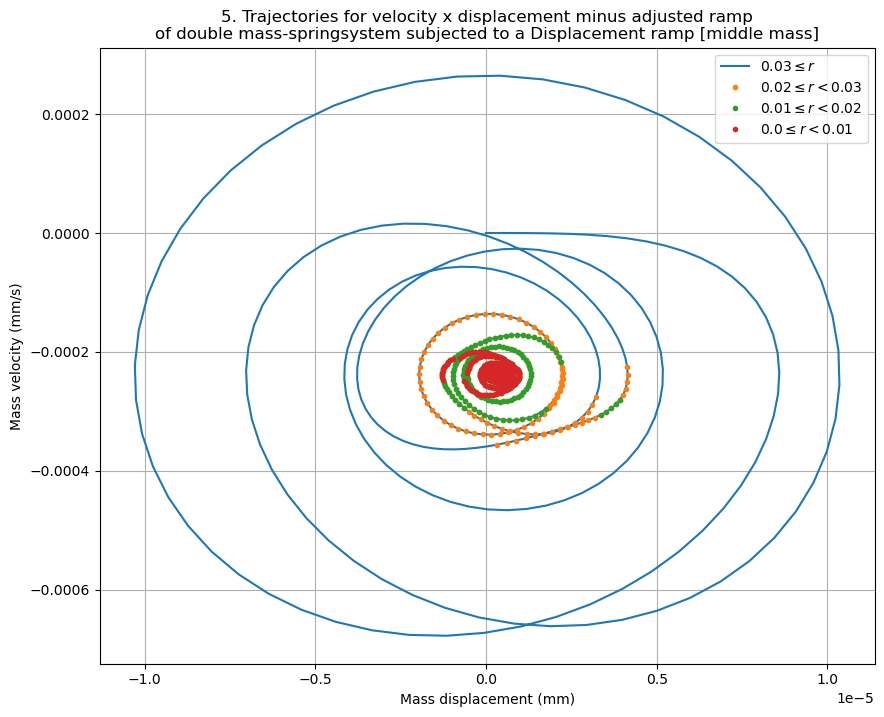

In [74]:
rampa_disc = [ ax[0][i] - rampa_disp(at[i])/2 for i in range(len(t)) ]
ffplot2D_vel_desl(rampa_disc,ay[0])

In [75]:

r1, r2, r3 = 0.01, 0.02, 0.03
p=1

def ffplot2D_vel_desl(x3pre,y1pre):
    u = x3pre # *1e3
    v = y1pre # *np.sqrt(ms)*1e3
    plt.figure(figsize=(10,8))
    plt.grid(visible=True)
    plt.xlabel('Mass displacement (mm)')
    plt.ylabel('Mass velocity (mm/s)')
    plt.plot(u,v,)#'.')
    assert len(u) == len(v)
    n = len(u)
    distances = []
    delta_u = (max(u)-min(u))/2
    print('delta_u: '+str(delta_u))
    delta_v = (max(v)-min(v))/2
    print('delta_v: '+str(delta_v))
    for k in range(n-p):
        distances.append(np.sqrt(((u[k+p]-u[k])/delta_u)**2+((v[k+p]-v[k])/delta_v)**2))
    u1,u2,u3, v1,v2, v3 = [],[],[],[],[],[]
    for k in range(len(distances)):
        if distances[k] < r1:
            u1.append(u[k])
            v1.append(v[k])
        if distances[k] < r2:
            u2.append(u[k])
            v2.append(v[k])
        if distances[k] < r3:
            u3.append(u[k])
            v3.append(v[k])
    plt.title('6. Trajectories for velocity x displacement minus adjusted ramp\n'+\
              'of double mass-spring'+\
              'system subjected to a Displacement ramp [edge mass]')
    plt.plot(u3,v3,'.')
    plt.plot(u2,v2,'.')
    plt.plot(u1,v1,'.')
    plt.legend((r'$'+str(r3)+' \leq r$',r'$'+str(r2)+'\leq r<'+str(r3)+\
                '$',r'$'+str(r1)+' \leq r<'+str(r2)+'$',r'$0.0 \leq r<'+str(r1)+'$'))
    plt.savefig('6_double_disp_edge.png')
    plt.show()

delta_u: 9.503192330839738e-06
delta_v: 0.00044137389125393


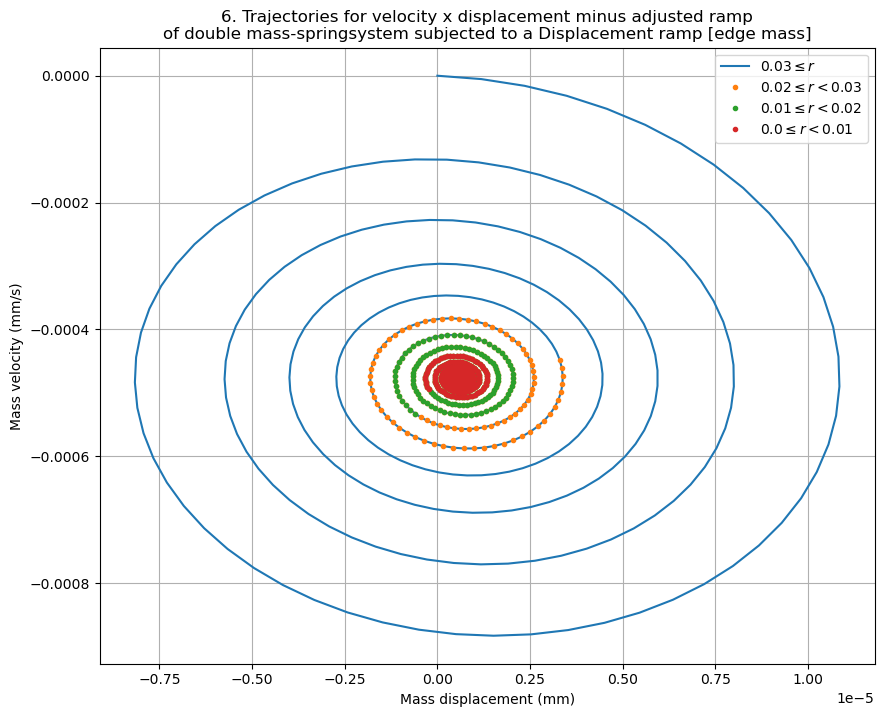

In [76]:
rampa_disc = [ ax[1][i] - rampa_disp(at[i]) for i in range(len(t)) ]
ffplot2D_vel_desl(rampa_disc,ay[1])